## Approach 1: Dynamic Programming

### Homogeneous Exponential Case

In [1]:
import numpy as np
import scipy
import math
from scipy.stats import poisson
from scipy.optimize import minimize

def cost(t,i,k,mu,omega,n,C_matrix):
    """
    Computes the cost when t is the next interarrival time.
    """
    
    Fk = [poisson.cdf(k,mu*t), poisson.cdf(k-2,mu*t), poisson.cdf(k-1,mu*t)]
    f = (1 - Fk[-1]) * t - (1 - Fk[0]) * k / mu
    g = (k - 1) / mu
#     g = Fk[-1] * (k - 1) * t - Fk[-2] * mu * t**2 / 2 + (1 - Fk[0]) * k * (k - 1) / (2 * mu)
    
    cost = omega * f + (1 - omega) * g
    cost += (1 - Fk[-1]) * Cstar_homexp(i+1,1,mu,omega,n,C_matrix)
    for l in range(2,k+2):
        cost += poisson.pmf(k-l+1,mu*t) * Cstar_homexp(i+1,l,mu,omega,n,C_matrix)
    
    return cost


def Cstar_homexp(i,k,mu=1,omega=1/2,n=15,C_matrix=None):
    """
    Implements the Homogeneous Exponential Case.
    """

    if C_matrix[i-1][k-1] != None: # retrieve stored value
        pass
    elif i == n: # initial condition
        C_matrix[i-1][k-1] = (1 - omega) * (k - 1) / mu
#         C_matrix[i-1][k-1] = (1 - omega) * k * (k - 1) / (2 * mu)
    else:
        optimization = minimize(cost,0,args=(i,k,mu,omega,n,C_matrix))#,method='Nelder-Mead')
        C_matrix[i-1][k-1] = optimization.fun #[0]
        minima[i-1][k-1] = optimization.x[0]
#         print(f'{i:2d} {k:2d} {minima[i-1][k-1]:2.4f} {C_matrix[i-1][k-1]:2.4f}')
    
    return C_matrix[i-1][k-1]


In [2]:
import time
start = time.time()

omega = 0.1
n = 15

C_matrix = [[None for k in range(n+1)] for i in range(n)]
minima = [[None for k in range(n+1)] for i in range(n)]

# compute values
# print('(i,k,t,C)')
for i in range(1,n+1):
    for k in range(1,i+1):
        Cstar_homexp(i,k,mu=1,omega=omega,n=n,C_matrix=C_matrix)

# cost
print("\nTotal Cost:", C_matrix[0][0])

# line colors
cmap = plt.cm.coolwarm
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=cmap(np.linspace(0,.4,n+1)))

# plot points
for i in range(1,n):
    points = []
    for k in range(1,n):
        if minima[i-1][k-1] != None:
            points.append(round(minima[i-1][k-1],5))
#             points.append(round(C_matrix[i-1][k-1],5))
    
    print("\n i =", i, "\n", points)
#     plt.plot(range(1,len(points)+1), points, 'o-', label='k = %i' %i)

print(time.time() - start)

# plt.title('Model for 15 Customers, $\mu$=1')
# plt.xticks(range(1,16))
# plt.yticks([0,5,10,15])
# plt.grid()
# plt.xlabel('Client $i$')
# plt.ylabel('Time until Next Customer')
# plt.show()

# # plot color bar
# def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
#     new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
#         'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
#         cmap(np.linspace(minval, maxval, n)))
#     return new_cmap

# fig, ax = plt.subplots(1,figsize=(6,1))
# fig.subplots_adjust(bottom=0.5)
# cmap = truncate_colormap(mpl.cm.coolwarm,0,.4)
# norm = mpl.colors.Normalize(vmin=0, vmax=15)

# cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,norm=norm,orientation='horizontal', ticks=range(16))
# cb1.set_label('Number in System (k)')


Total Cost: 3.3239668485559366


NameError: name 'plt' is not defined

In [9]:
# t = [0.,2.50250411,5.21651815,7.92079277,10.42968025]
# # t = [0,2.50250411,2.71401404,2.70427462,2.50888748]
# n = len(t)
# mu =  1
# omega = 0.5

# C_matrix = [[None for k in range(n)] for i in range(n)]
# c_stored = [[[None for j in range(n)] for l in range(n)] for k in range(n)]
# minima = [[None for k in range(n+1)] for i in range(n)]

# print("Cost:",C_static_hom(t,1,1,mu,omega,n))

# for i in range(1,n+1):
#     for k in range(1,i+1):
#         print(t[i-1])
#         C_static_het(t[i-1],i,k,mu,omega=omega,n=n)

# C_matrix

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

In [4]:
def C_static_hom(times,i,k,mu,omega=0.5,n=15):
    """
    TODO.
    """
    mu = np.array(mu)

#     print("i",i)
    if C_matrix[i-1][k-1] != None: # retrieve stored value
        pass
    elif i == n: # initial condition
        C_matrix[i-1][k-1] = (1 - omega) * (k - 1) / mu
    else:
#         print("n",n)
#         print("i:",i)
        t = times[i]
        print(t)
        
        Fk = [poisson.cdf(k,mu*t), poisson.cdf(k-2,mu*t), poisson.cdf(k-1,mu*t)]
        f = (1 - Fk[-1]) * t - (1 - Fk[0]) * k / mu
        g = (k - 1) / mu
    
        cost = omega * f + (1 - omega) * g
        cost += (1 - Fk[-1]) * Cstar_homexp(i+1,1,mu,omega,n,C_matrix)
        for l in range(2,k+2):
            cost += poisson.pmf(k-l+1,mu*t) * Cstar_homexp(i+1,l,mu,omega,n,C_matrix)

        C_matrix[i-1][k-1] = cost
        print(i,k,minima[i-1][k-1],C_matrix[i-1][k-1]) # displays C_i(k) and interarrival time
    
#     print(i,k,C_matrix[i-1][k-1])
    return C_matrix[i-1][k-1]



Cost: 3.3239668485559366

 k = 0 
 [2.38, 2.38, 2.38, 2.38, 2.38, 2.38, 2.38, 2.38, 2.38, 2.38, 2.38, 2.38, 2.3]

 k = 1 
 [3.98, 3.98, 3.98, 3.98, 3.98, 3.98, 3.98, 3.98, 3.98, 3.98, 3.98, 3.98, 3.89]

 k = 2 
 [5.42, 5.42, 5.42, 5.42, 5.42, 5.42, 5.42, 5.42, 5.42, 5.42, 5.42, 5.32]

 k = 3 
 [6.79, 6.79, 6.79, 6.79, 6.79, 6.79, 6.79, 6.79, 6.79, 6.79, 6.68]

 k = 4 
 [8.11, 8.11, 8.11, 8.11, 8.11, 8.11, 8.11, 8.11, 8.11, 7.99]

 k = 5 
 [9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.27]

 k = 6 
 [10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.53]

 k = 7 
 [11.9, 11.9, 11.9, 11.9, 11.9, 11.9, 11.77]

 k = 8 
 [13.13, 13.13, 13.13, 13.13, 13.13, 12.99]

 k = 9 
 [14.35, 14.35, 14.35, 14.35, 14.21]

 k = 10 
 [15.55, 15.55, 15.55, 15.41]

 k = 11 
 [16.75, 16.75, 16.6]

 k = 12 
 [17.93, 17.78]

 k = 13 
 [18.96]

 k = 14 
 []


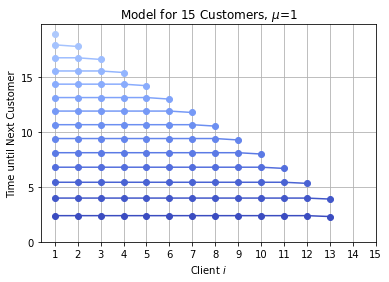

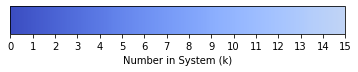

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

omega=0.1
n = 15

C_matrix = [[None for k in range(n+1)] for i in range(n)]
minima = [[None for k in range(n+1)] for i in range(n)]

# compute values
for i in range(1,n+1):
    for k in range(1,i+1):
        Cstar_homexp(i,k,mu=1,omega=omega,n=n,C_matrix=C_matrix)

# cost
print("\nCost:", C_matrix[0][0])

# line colors
cmap = plt.cm.coolwarm
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=cmap(np.linspace(0,.4,n+1)))

# plot points
for k in range(n):
    points = []
    for i in range(1,n):
        if minima[i][k] != None:
            points.append(round(minima[i][k],2))
    
    print("\n k =", k, "\n", points)
    plt.plot(range(1,len(points)+1), points, 'o-', label='k = %i' %i)

plt.title('Model for 15 Customers, $\mu$=1')
plt.xticks(range(1,16))
plt.yticks([0,5,10,15])
plt.grid()
plt.xlabel('Client $i$')
plt.ylabel('Time until Next Customer')
plt.show()

# plot color bar
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

fig, ax = plt.subplots(1,figsize=(6,1))
fig.subplots_adjust(bottom=0.5)
cmap = truncate_colormap(mpl.cm.coolwarm,0,.4)
norm = mpl.colors.Normalize(vmin=0, vmax=15)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,norm=norm,orientation='horizontal', ticks=range(16))
cb1.set_label('Number in System (k)')

In [6]:
minima

[[2.3798015348883403,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [2.37980120856284,
  3.981737324584402,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [2.3798011926520823,
  3.981737447115383,
  5.424549084799521,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [2.3798014413746955,
  3.9817371825918086,
  5.4245475636338085,
  6.791122613204874,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [2.3798012159842528,
  3.981737088291493,
  5.424548042808739,
  6.79112252392706,
  8.110854683634518,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [2.379801508888327,
  3.981737390244792,
  5.424548434151618,
  6.791123443086874,
  8.11085678557943,
  9.397949107270499,
  None,
  None,
  None,
  None,

In [7]:
omegas = np.linspace(0,1,11)
Ns = np.linspace(5,30,6)
costs = [[None for i in range(11)] for j in range(6)]

for r in range(11):
    for s in range(6):
        
        N, omega = int(Ns[s]), omegas[r]
        
        C_matrix = [[None for k in range(N+1)] for i in range(N+1)]
        minima = [[None for k in range(N+1)] for i in range(N+1)]
        
        C_matrix[0][0] = 0
        minima[0][0] = 0

        # compute values
        for i in range(1,N+1):
            for k in range(1,i+1):
                if not (not i and not k):
                    Cstar_homexp(i,k,mu=1,omega=omega,n=N,C_matrix=C_matrix)

        # cost
        costs[s][r] = C_matrix[N][0]
        print("omega =",round(omega,1),"\t n =",N,"\t Cost:",C_matrix[N-1][1])
    
    print("\n")

for i in range(6):
    plt.plot(costs[i], label=str('n=' + str(Ns[i])))
plt.xlabel('omega')
plt.ylabel('$C_n^{\star}(0)$')
plt.legend()

omega = 0.0 	 n = 5 	 Cost: 1.0
omega = 0.0 	 n = 10 	 Cost: 1.0


KeyboardInterrupt: 

In [8]:
def compute_probs_N(t,mu=1):
    """
    Computes P(N_ti = j) for i=1,...,n and j=1,...,i.
    """
    
    n = len(t)
    probs = [[None for i in range(n)] for j in range(n)]
    
    probs[0][0] = 1
    
    for i in range(2,n+1):
        
        x = t[i-1] - t[i-2]
        
        # j = 1
        probs[i-1][0] = 0
        for l in range(1,i):
            probs[i-1][0] += (1 - poisson.cdf(l-1,mu*x)) * probs[i-2][l-1]

        # j = 2,...,i
        for j in range(2,i+1):
            probs[i-1][j-1] = 0
            for l in range(j-1,i):
                probs[i-1][j-1] += poisson.pmf(l-j+1,mu*x) * probs[i-2][l-1]
            
    return probs
    

def static_cost_hom(t,mu=1,omega=0.5):
    """
    Computes the 
    """
    
#     t = [0] + t
    n = len(t)
    
    # total expected waiting/idle time
    sum_EW, sum_EI = 0, 0
    probs = compute_probs_N(t,mu)
    
    for i in range(2,n+1):
        for j in range(2,i+1):
            sum_EW += probs[i-1][j-1] * (j - 1) / mu
            
        for j in range(1,i):
            
            x = t[i-1] - t[i-2]
            f = (1 - poisson.cdf(j-1,mu*x)) * x - (1 - poisson.cdf(j,mu*x)) * j / mu
            sum_EI += f * probs[i-2][j-1]
            
    return omega * sum_EI + (1 - omega) * sum_EW


In [9]:
mu = 1
omega = 0.1
n = 5

test = minimize(static_cost_hom,range(n),args=(mu,omega))
print(test)
test = test.x
print(test - test[0])
print("a")
print(static_cost_hom(test - test[0],mu,omega))

      fun: 0.9839108836327182
 hess_inv: array([[ 7.83738515,  0.9940321 , -0.24096874, -3.24467335, -4.34658955],
       [ 0.9940321 ,  3.40171965,  1.23736291, -1.97078015, -2.66300689],
       [-0.24096874,  1.23736291,  3.88909763, -1.18877727, -2.69832953],
       [-3.24467335, -1.97078015, -1.18877727,  5.38128342,  2.02456135],
       [-4.34658955, -2.66300689, -2.69832953,  2.02456135,  8.68485343]])
      jac: array([ 1.26659870e-07, -9.66340303e-06,  8.00192356e-06, -2.60770321e-07,
        1.81794167e-06])
  message: 'Optimization terminated successfully.'
     nfev: 126
      nit: 17
     njev: 18
   status: 0
  success: True
        x: array([-3.21389904, -0.71139495,  2.00261912,  4.70689352,  7.21578129])
[ 0.          2.50250409  5.21651816  7.92079256 10.42968033]
a
0.9839108836327182


In [23]:
optim = minimize(static_cost_hom,range(n),args=(mu,omega), method='BFGS')
optim

      fun: 0.9839108836327182
 hess_inv: array([[ 7.83738515,  0.9940321 , -0.24096874, -3.24467335, -4.34658955],
       [ 0.9940321 ,  3.40171965,  1.23736291, -1.97078015, -2.66300689],
       [-0.24096874,  1.23736291,  3.88909763, -1.18877727, -2.69832953],
       [-3.24467335, -1.97078015, -1.18877727,  5.38128342,  2.02456135],
       [-4.34658955, -2.66300689, -2.69832953,  2.02456135,  8.68485343]])
      jac: array([ 1.26659870e-07, -9.66340303e-06,  8.00192356e-06, -2.60770321e-07,
        1.81794167e-06])
  message: 'Optimization terminated successfully.'
     nfev: 126
      nit: 17
     njev: 18
   status: 0
  success: True
        x: array([-3.21389904, -0.71139495,  2.00261912,  4.70689352,  7.21578129])

In [14]:
dir(optim)

['fun',
 'hess_inv',
 'jac',
 'message',
 'nfev',
 'nit',
 'njev',
 'status',
 'success',
 'x']

In [157]:
static_cost_hom([ 0.          ,2.50250411,  5.21651815,  7.92079277, 10.42968025],1,omega=0.1)

0.9839108836322258

In [4]:
mu = 1
omegas = np.linspace(.1,1,10)
Ns = [20,25,30] #np.linspace(5,30,6)

for n in Ns:
    for omega in omegas:
        optimization = minimize(static_cost_hom,range(int(n)),args=(mu,omega)) #,bounds=((0,0),) + (((0,None)),) * (int(n)-1))
        times = optimization.x
        print("omega =",round(omega,1),"\t n =",n)
        times = times - times[0]
        print(times)
        print("Cost:",static_cost_hom(times,mu,omega))
        print("\n")
        
    print("\n")

omega = 0.1 	 n = 20
[ 0.          2.50477514  5.22804468  7.96964327 10.71523145 13.46193999
 16.20896984 18.95608216 21.70324989 24.45049061 27.19775545 29.9449852
 32.69216271 35.43923741 38.18602199 40.9321057  43.67611386 46.41325981
 49.12250221 51.63244877]
Cost: 4.775703734014343


omega = 0.2 	 n = 20
[ 0.          1.88580508  4.09480585  6.34049145  8.59662052 10.85657592
 13.11813962 15.38044616 17.64307828 19.90580464 22.16849592 24.43103393
 26.69319728 28.95457313 31.21438806 33.47094615 35.72011446 37.95095076
 40.1269283  42.03273027]
Cost: 7.2685559865586145


omega = 0.3 	 n = 20
[ 0.          1.51604694  3.43108488  5.39976458  7.38573063  9.37887099
 11.37537392 13.37356523 15.37256153 17.37180166 19.37086865 21.36934576
 23.36665046 25.36182831 27.35319703 29.33755099 31.3081503  33.24896014
 35.11303138 36.67251773]
Cost: 8.904883384048098


omega = 0.4 	 n = 20
[ 0.          1.24047022  2.94041749  4.71060566  6.50517146  8.31057223
 10.12142128 11.93510605 13.75

Cost: 16.141741599164366


omega = 0.6 	 n = 30
[ 0.          0.80528875  2.16144182  3.62438371  5.128413    6.65284621
  8.18879306  9.73172974 11.27912958 12.82946768 14.38172952 15.93518966
 17.48929307 19.04360008 20.59771839 22.15127223 23.70386245 25.25502352
 26.80418462 28.35061334 29.89333801 31.43101763 32.96173601 34.48265314
 35.9893831  37.47479201 38.92634882 40.31954985 41.59780005 42.5691573 ]
Cost: 16.175253662872883


omega = 0.7 	 n = 30
[ 0.          0.60933722  1.79886494  3.11793954  4.48876507  5.88606236
  7.29868103  8.72085583 10.14927555 11.58184412 13.01712126 14.45405214
 15.89182456 17.32976258 18.76726634 20.20374533 21.63857851 23.07106562
 24.50037498 25.92547576 27.34504892 28.75734837 30.15997052 31.54948895
 32.92079906 34.2659312  35.57158671 36.81315027 37.93721187 38.77617055]
Cost: 15.323721644670247


omega = 0.8 	 n = 30
[ 0.          0.41210038  1.41149199  2.5703069   3.79518424  5.05474418
  6.33477753  7.62783673  8.92953273 10.23699171 11

In [5]:
mu = 1
omega = 0.3
n = 20
minimize(static_cost_hom,range(n),args=(mu,omega),bounds=((0,0),) + (((0,None)),) * (n-1), method='l-bfgs-b',options={'eps':1e-12,'maxiter':10**5})

NameError: name 'static_cost_hom' is not defined

In [ ]:
# def cost_hom2(t,i,k,mu=1,omega=1/2,N=15,C_matrix=None,minima=None):
#     """
#     Implements the Homogeneous Exponential Case.
#     """

#     if C_matrix[i][k] != None: # retrieve stored value
#         pass
#     elif not i and k > 0: # initial condition
#         C_matrix[i][k] = (1 - omega) * (k - 1) / mu
# #         C_matrix[i][k] = (1 - omega) * k * (k - 1) / (2 * mu)
#         minima[i][k] = 0
#     else:        
# #         optimization = minimize(cost,0,args=(i,k,mu,omega,N,C_matrix),bounds=((0,100),))
#         C_matrix[i][k] = cost(t[N-i-1],i,k,mu,omega,N,C_matrix)
#         minima[i][k] = optimization.x[0]
        
    
#     return C_matrix[i][k]

# cost_hom

In [1]:
mu = 1

In [11]:
k = 3 
t = 2

In [14]:
Fk = [poisson.cdf(k,mu*t), poisson.cdf(k-2,mu*t), poisson.cdf(k-1,mu*t)]
f = (1 - Fk[-1]) * t - (1 - Fk[0]) * k / mu
f

0.21801754912951432